<a href="https://colab.research.google.com/github/Sanketvp4/Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sklearn

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
print("finishing import")

finishing import


In [ ]:
# importing data 
from sklearn.datasets import load_boston
var = load_boston()

# print(var.keys())


In [ ]:
print(var.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# creating data frame
df = pd.DataFrame(var.data, columns=var.feature_names)

In [ ]:
print("This is first 5 column of the data")
print()
print(df.head())
print("-" * 150)

print("This is last 5 column of the data")
print()
print(df.tail())

This is first 5 column of the data

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------
This is last 5 column of the data

        CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
501  0.06263  0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527  0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076  0.0  11.93   0.0  0.573  ...  1.0  2

In [ ]:
df['PRICE'] = var['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(var.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


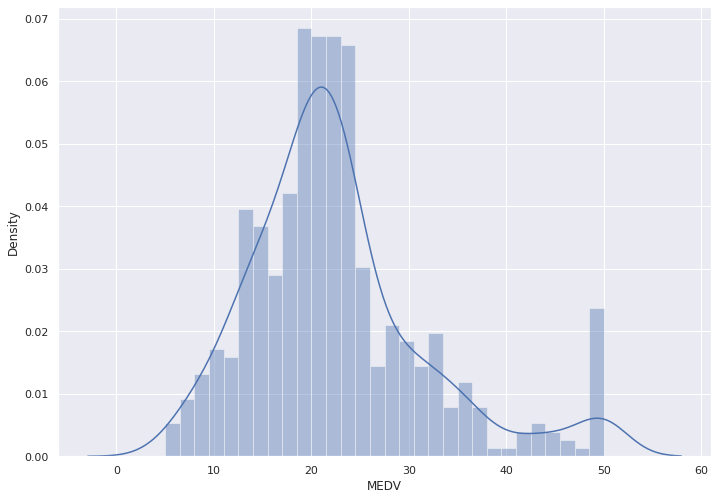

In [ ]:
df['MEDV']=var.target
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

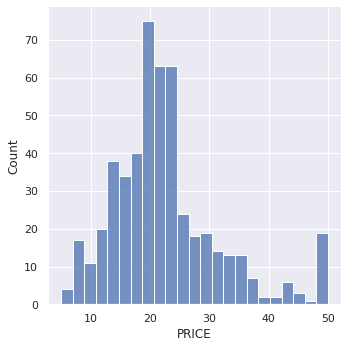

In [ ]:
sns.displot(df['PRICE'])

In [ ]:
# Model implimentation
from sklearn.model_selection import train_test_split

# Note that y is dependent variable.
y = df['PRICE']

#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = df.iloc[:,0:13] # The seperation by ',' indicates 2D array.

# Spliting the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#checking the shape of each set.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


In [ ]:
# Prepairing training the model with liner regression.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# After training liner regression model, now these trained regression objects have coefficients and intercepts as attributes as you can see in the above cell result.
print('labels\n',X.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients: 
 [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Intercept: 
 37.93710774183309
R2 for Train 0.7645451026942549
R2 for Test (cross validation) 0.6733825506400171


In [ ]:
# Data Visualizaton of the coefficient.
# Check the above coefficients and the table.
pd.DataFrame( list(zip(X.columns, lm.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.121310
1,ZN,0.044466
2,INDUS,0.011342
3,CHAS,2.511246
4,NOX,-16.231253
5,RM,3.859068
6,AGE,-0.009985
7,DIS,-1.500270
8,RAD,0.242143
9,TAX,-0.011072


In [ ]:
# Normalization of data, which means making the values of the datasets between 0 to 1.
# This is done for the faster compilation.
# R-squared(R-2) method is used to maintain the value between 0 to 1
# And value of r is from -1 to 1.

# Cross validation tuning
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, cv=8) 
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: [0.69809776 0.6848557  0.61677678 0.74414545 0.75431003 0.62128711
 0.84406153 0.78197333] 
 R2_avg: 0.72 (+/- 0.15)


In [ ]:
# NOw the formation of base model that is to be run.
# Here genarating a list of length equal to that number. Then we can cast it as Pandas Series.

y_train_base = pd.Series([np.mean(y_train)] * y_train.size)
y_test_base = pd.Series([np.mean(y_train)] * y_test.size)
print(y_train_base.head(), '\n Size:', y_train_base.size)
print(y_test_base.head(), '\n Size:', y_test_base.size)

0    22.74548
1    22.74548
2    22.74548
3    22.74548
4    22.74548
dtype: float64 
 Size: 354
0    22.74548
1    22.74548
2    22.74548
3    22.74548
4    22.74548
dtype: float64 
 Size: 152


In [ ]:
# Using the R2 score method to accept the values and pridict values.

from sklearn.metrics import r2_score
r2_train_base= r2_score(y_train, y_train_base)
r2_train_reg = r2_score(y_train, lm.predict(X_train))

r2_test_base = r2_score(y_test, y_test_base)
r2_test_reg = r2_score(y_test, lm.predict(X_test))
print(r2_train_base, r2_train_reg,r2_test_base,r2_test_reg  )

-2.220446049250313e-16 0.7645451026942549 -0.006019731947687124 0.6733825506400171


In [ ]:
#total sum of squares 
ss_tot_train=np.sum((y_train-np.mean(y_train))**2)
ss_res_train=np.sum((y_train-lm.predict(X_train))**2)
ss_reg_train=np.sum((lm.predict(X_train)-np.mean(y_train))**2)

r2_train_reg_manual= 1-(ss_res_train/ss_tot_train)

print(r2_train_reg, r2_train_reg_manual, ss_tot_train, ss_res_train, ss_reg_train )



0.7645451026942549 0.7645451026942549 30006.637768361583 7065.209814240267 22941.427954121544


In [ ]:
df['PRICE_REG']=lm.predict(df.iloc[:,0:13])
df[['PRICE', 'PRICE_REG']].head()

,PRICE,PRICE_REG
0,24.0,30.290795
1,21.6,24.885615
2,34.7,30.471178
3,33.4,28.472236
4,36.2,27.811077


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

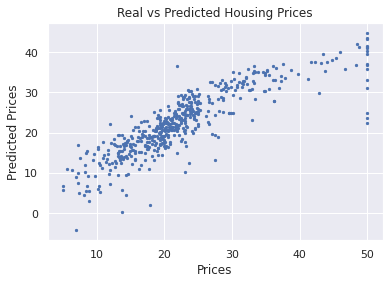

In [ ]:
# Data Visualization.

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['PRICE'], df['PRICE_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

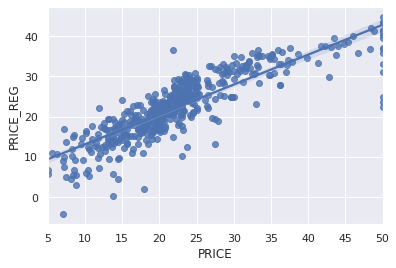

In [ ]:

import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=df[['PRICE','PRICE_REG']])

Text(0, 0.5, 'Residuals')

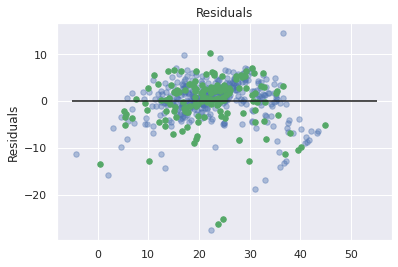

In [ ]:
# This shows error function.
plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
           c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
           c ='g', s=30 )
#The expected error is 0. 
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )

In [ ]:
#save the data
df.to_csv('boston.csv')

In [ ]:
import pickle
pickle.dump( lm, open( 'lm_reg_boston.p', 'wb' ) )

In [ ]:
#Load the pickled object. 
lm_pickled = pickle.load( open( "lm_reg_boston.p", "rb" ) )

lm_pickled.score(X_train, y_train)

0.7645451026942549